# 🔥포스🔥

### 위 게시글을 시리즈물📖입니다.  
**[1편. OpenCV의 기초, Numpy와 Matplotlib](https://dacon.io/codeshare/4768?page=1&dtype=recent)**<br>
**[2편. OpenCV 기초(이미지 입출력, 그리기, 창 관리, 이벤트 처리 등)](https://dacon.io/codeshare/4837?page=1&dtype=recent)**<br>
**[3편. 이미지 프로세싱(컬러 스페이스, 스레시홀딩, 이미지 연산, 히스토그램)](https://dacon.io/codeshare/4858?page=1&dtype=recent)**<br>
**[4편. OpenCV 기하학적 변환](https://dacon.io/codeshare/4875?page=1&dtype=recent)**<br>
**[5편. OpenCV 영상필터](https://dacon.io/codeshare/4898?page=1&dtype=recent)**<br>
**[프로젝트1편. Multi-Hand Gesture Recognition(1)](https://dacon.io/codeshare/4956?page=1&dtype=recent)**<br>
**[프로젝트2편. Multi-Hand Gesture Recognition(2)](https://dacon.io/codeshare/5006?page=1&dtype=recent)**<br>
**[6편. OpenCV 영상분할](https://dacon.io/codeshare/5072?page=1&dtype=recent&fType=)**<br>
**[7편. OpenCV 영상매칭과 추척](https://dacon.io/codeshare/5106)**<br>
**[8편. OpenCV과 머신러닝편(1)(K-means, K-NN, SVM)](https://dacon.io/codeshare/5146?page=1&dtype=recent&fType=)**    
**[8편.OpenCV과 머신러닝편(2)(HOG, BOW, 케스케이드 분류기)](https://dacon.io/codeshare/5179)**
* 안녕하세요 :) 데이크루 2기 *포스팀*입니다!
* 저희 마지막 프로젝트 게시글에 들어와주셔서 감사합니다!
* 앞으로도 포스팀의 행방 지켜봐주세요!

주제는!!!

✨
## **Segmentation Modeling(분할 모델링)**
✨

## 목차

### 1) U-NET 이란?
### 2) 데이터 설명
### 3) Code
#### 3-1) Data Augmentation 적용 x
#### 3-2) 논문 Data Augmentation 적용 o
#### 3-3) OpenCV 적용
### 4) 결론

# 그럼 시작합니다 ~:)




### 1) **[U-Net](https://arxiv.org/pdf/1505.04597.pdf)** : Convolutional Networks for Biomedical Image Segmentation

제목에서도 보듯, 의료영상에서 가장 기본적으로 많이 쓰이는 모형인 U-Net에 대하여 포스팅을 해보겠습니다. U-Net은 모형의 Architecture를 보면 U자 모양으로 되어 있어 생긴 이름입니다.

<img src ="https://drive.google.com/uc?export=view&id=1aBJ6L-yKg3B6kfAtHv16BEGkHRz0guPL">

**Encoder-Decoder** 구조로 이루어져 있는데 Encoder부분을 **Contracting path**라고 하고 Decoder부분을 **Expanding path**라고 합니다.

### Overlap-tile
<img src ="https://drive.google.com/uc?export=view&id=1vAApQTjHVams8qEuLXqtqbqFTblz2EKp">

U-Net에서는 Segmentation시 Overlap-tile 전략을 사용합니다. 여기서 말하는 Overlap-tile 전략이란, 이미지를 Patch 단위로 잘라 input으로 넣는다는 의미입니다. 위 사진에서도 보듯 Border 부분에 정보가 없는 빈 부분을 많이 쓰는 zero-padding이나 주변 값들로 채우는 것이 아닌 Mirroring 방법으로 채워줍니다. 노란색 영역은 실제 Segmentation 될 영역이고 파랑색 영역은 Patch입니다. 살펴보면 왼쪽 사진에 Border 부분이 거울처럼 반사되어 채워진 것을 볼 수 있습니다. 
[블로그](https://medium.com/@eunsook/u-net-%EB%85%BC%EB%AC%B8-b84e17d6378e)에서 보이는 바와 같이 Patch 단위로 잘라서 Segmentation을 하게 되는데 아래처럼 겹쳐서 뜯어내기 때문에 Overlap-tile이라고 합니다.

### U-Net Network Architecture

U-Net Network Architecture는 그림처럼 두 가지로 나뉩니다.
- Contracting Path<br>
- Expanding Path<br>


하나씩 설명을 해보겠습니다.

#### Contracting Path

위 과정은 전형적인 Convolutional network를 수행합니다. 먼저, input을 3x3 convolution layer를 지나가게 만듭니다. 이때, input이나 layer에 따로 padding 처리를 해주지 않기 떄문에 feature map이 조금씩 줄어듭니다. 각각의 활성화 함수로 ReLU를 사용하며 2x2 max pooling layer(stride=2)를 이용하여 크기가 줄어들게(downsampling) 만듭니다. 위 과정을 두 번 반복해줍니다. 이때, channel의 크기는 단계를 지나갈 때마다 2배 커지게 만듭니다. 이 과정은 VGG 모형 기반의 Architecture를 쓴다고 합니다.

#### Expanding Path

위 과정에서는 2x2 Convolutional layer를 사용하고 channel의, 크기는 앞 Path와 반대로2배씩 줄어들게 만듭니다. 대부분은 앞 Path와 반대로 하면 되는데 특징은 Contracting Path에서 max pooling layer를 거치기 전의 featur map을 crop하여 concatenation해 Convolutional layer에 넣게 됩니다. 마지막 layer에서는 1x1 Convolutional layer를 사용하여 분류합니다.

#### BottleNeck

요 과정은 Contracting Path에서 Expanding Path로 넘어가는 부분을 나타내는 과정입니다. 3x3 Convolution Layer + ReLU + BatchNorm (No Padding, Stride 1)을 두 번 반복하고 Dropout Layer를 지나갑니다.


이를 구현해보면 다음과 같이 구현할 수 있습니다.

In [ ]:
import torch
import torch.nn as nn

class UNet(nn.Module):
    def cont_block(self, in_channels, out_channels, kernel_size=3):
        block = nn.Sequential(nn.Conv2d(in_channels=in_channels, out_channels=out_channels, 
                                        kernel_size=kernel_size, padding=1),
                              nn.ReLU(),
                              nn.Dropout2d(), # p=0.5
                              nn.Conv2d(in_channels=out_channels, out_channels=out_channels, 
                                        kernel_size=kernel_size, padding=1),
                              nn.ReLU(),
                              nn.BatchNorm2d(out_channels))
        return block
    
    def expn_block(self, in_channels, mid_channel, out_channels, kernel_size=3):
        block = nn.Sequential(nn.Conv2d(in_channels=in_channels, out_channels=mid_channel,
                                        kernel_size=kernel_size, padding=1),
                              nn.ReLU(),
                              nn.Dropout2d(),
                              nn.Conv2d(in_channels=mid_channel, out_channels=mid_channel,
                                        kernel_size=kernel_size, padding=1),
                              nn.ReLU(),
                              nn.BatchNorm2d(mid_channel),
                              nn.ConvTranspose2d(in_channels=mid_channel, out_channels=out_channels,
                                                 kernel_size=kernel_size, stride=2, padding=1, output_padding=1))
        return block
    
    def final_block(self, in_channels, mid_channel, out_channels, kernel_size=3):
        block = nn.Sequential(nn.Conv2d(in_channels=in_channels, out_channels=mid_channel,
                                        kernel_size=kernel_size, padding=1),
                              nn.ReLU(),
                              nn.Dropout2d(),
                              nn.Conv2d(in_channels=mid_channel, out_channels=mid_channel,
                                        kernel_size=kernel_size, padding=1),
                              nn.ReLU(),
                              nn.BatchNorm2d(mid_channel),
                              nn.Conv2d(in_channels=mid_channel, out_channels=out_channels,
                                        kernel_size=kernel_size, padding=1),
                              nn.Sigmoid()
                              )
        return block
    
    def __init__(self, in_channel, out_channel):
        super(UNet, self).__init__()
        self.contl_1 = self.cont_block(in_channels=in_channel, out_channels=64)
        self.contl_1_mp = nn.MaxPool2d(kernel_size=2)
        self.contl_2 = self.cont_block(in_channels=64, out_channels=128)
        self.contl_2_mp = nn.MaxPool2d(kernel_size=2)
        self.contl_3 = self.cont_block(in_channels=128, out_channels=256)
        self.contl_3_mp = nn.MaxPool2d(kernel_size=2)
        self.contl_4 = self.cont_block(in_channels=256, out_channels=512)
        self.contl_4_mp = nn.MaxPool2d(kernel_size=2)
        
        self.bottleneck = nn.Sequential(nn.Conv2d(in_channels=512, out_channels=1024, 
                                                  kernel_size=3, padding=1),
                                        nn.ReLU(),
                                        nn.BatchNorm2d(1024),
                                        nn.Conv2d(in_channels=1024, out_channels=1024, 
                                                  kernel_size=3, padding=1),
                                        nn.ReLU(),
                                        nn.BatchNorm2d(1024),
                                        nn.ConvTranspose2d(in_channels=1024, out_channels=512,
                                                           kernel_size=3, stride=2, padding=1, output_padding=1)
                                        )
        
        self.expnl_1 = self.expn_block(1024, 512, 256)
        self.expnl_2 = self.expn_block(512, 256, 128)
        self.expnl_3 = self.expn_block(256, 128, 64)
        self.final_layer = self.final_block(128, 64, out_channel)
    
    def crop_and_concat(self, upsampled, bypass, crop=False):
        if crop:
            c = (bypass.size()[2] - upsampled.size()[2]) // 2
            bypass = F.pad(bypass, (-c, -c, -c, -c))
        return torch.cat((upsampled, bypass), 1)
    
    def forward(self, x):
        contl_1_out = self.contl_1(x) 
        contl_1_pool = self.contl_1_mp(contl_1_out)
        contl_2_out = self.contl_2(contl_1_pool)
        contl_2_pool = self.contl_2_mp(contl_2_out)
        contl_3_out = self.contl_3(contl_2_pool)
        contl_3_pool = self.contl_3_mp(contl_3_out)
        contl_4_out = self.contl_4(contl_3_pool)
        contl_4_pool = self.contl_4_mp(contl_4_out)
        
        bottleneck_out = self.bottleneck(contl_4_pool)
        
        """ Skip connection of the expansive sub-module """
        expnl_1_cat = self.crop_and_concat(bottleneck_out, contl_4_out)
        expnl_1_out = self.expnl_1(expnl_1_cat)
        expnl_2_cat = self.crop_and_concat(expnl_1_out, contl_3_out)
        expnl_2_out = self.expnl_2(expnl_2_cat)
        expnl_3_cat = self.crop_and_concat(expnl_2_out, contl_2_out)
        expnl_3_out = self.expnl_3(expnl_3_cat)
        final_cat = self.crop_and_concat(expnl_3_out, contl_1_out)
        final_out = self.final_layer(final_cat)
        
        return final_out

### Training

Training은 SGD(Stochastic Gradient Descent)로 구현되었습니다. 논문에서는 GPU memory 사용량을 최대화시키기 위해 batch size보다 input tile의 size를 크게 주었습니다. 이로 인해, batch size가 작기 때문에 보완하고자 momentum 값을 0.99로 주어 더 잘 Training이 반영되도록 하였습니다.


### Data Augmentation
<img src ="https://drive.google.com/uc?export=view&id=157QAiGkJGGIKd97zaM3JIpQoCQwHAbkM">
<center>출처 : https://stat-cbc.tistory.com/28 </center>
3x3 elastic 변환 행렬을 통해 Data Augmentation을 수행합니다. 세포를 Segmentation 하는 것이기 땨문에 위 변환 행렬의 적용이 성능 향상에 큰 역할을 했다고 합니다.

### 사용한 판단 척도

위 게시글에서 판단 척도로는 loss값과 IoU값이 있습니다. IoU값의 식은 **(두 이미지의 교집합)/(두 이미지의 합집합)** 으로 나타낼 수 있습니다.

아래는 구현한 식 입니다.

In [ ]:
def iou(pred, target, n_classes = 2):
    
    iou = []
    pred = pred.view(-1)
    target = target.view(-1)

    # Ignore IoU for background class ("0")
    for cls in range(1, n_classes):
        pred_inds = pred == cls
        target_inds = target == cls
        intersection = (pred_inds[target_inds]).long().sum().data.cpu().item()
        union = pred_inds.long().sum().data.cpu().item() + target_inds.long().sum().data.cpu().item() - intersection

        if union == 0:
            iou.append(float('nan'))  # If there is no ground truth, do not include in evaluation
        else:
            iou.append(float(intersection) / float(max(union, 1)))

    return sum(iou)

In [ ]:
def iou_metric(y_pred, y_true, n_classes = 2):
    miou = []
    for i in np.arange(0.5, 1.0, 0.05):
        y_pred_ = (y_pred > i)
        iou_init = iou(y_pred_, y_true, n_classes = n_classes)
        miou.append(iou_init)
    
    return sum(miou)/len(miou)

### 2) 데이터 설명

위 데이터 세트에는 많은 수의 분할된 핵 이미지가 포함되어 있습니다. 영상의 출처는 https://www.kaggle.com/competitions/data-science-bowl-2018 으로 세포 유형, 확대 및 영상 촬영 방식이 다르도록 다양한 조건에서 얻어진 데이터입니다. 

각 이미지는 연관된 ImageId로 표시되고, 이미지가 속한 파일은 해당 ImageId를 가진 폴더에 들어 있습니다. 이 폴더에는 두 개의 하위 폴더가 있는데, images에는 이미지 파일이 포함되어 있고 마스크에는 각 핵의 분할된 마스크가 포함되어 있습니다. 마스크 폴더는 train 세트에만 들어있고, 각 마스크에는 하나의 핵이 들어 있습니다. 

- /stage1_train/* : train 세트 이미지 (images and annotated masks)  
- /stage1_test/* : test 이미지 (images only, you are predicting the masks)

### 3) Code

구글 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


패키지 불러오기

In [ ]:
import os
import random
from sklearn.model_selection import train_test_split
import torchvision.transforms.functional as TF

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import cv2

import numpy as np
import matplotlib.pyplot as plt

시드 고정

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(42)

gpu 설정

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# device = "cpu"

필요한 파라미터 설정

In [ ]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
width_out = 128
height_out = 128

In [ ]:
!ls

drive  sample_data


In [1]:
#%cd (자신의 경로)

데이터 zip파일 풀어주기

In [ ]:
#!unzip dataset.zip

데이터 불러오기

In [ ]:
rt_path = "dataset/"
TRAIN_PATH = os.path.join(rt_path, "stage1_train/")
TEST_PATH = os.path.join(rt_path, "stage1_test/")

train_dir = os.listdir(TRAIN_PATH)
test_dir = os.listdir(TEST_PATH)
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

x_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
y_train = np.zeros((len(train_ids), height_out, width_out, 1), dtype=bool)
x_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)


In [ ]:
for i, id_ in enumerate(train_ids):
    path = TRAIN_PATH + id_
    img = cv2.imread(path+'/images/'+id_+'.png')
    img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
    x_train[i] = img

    mask = np.zeros((height_out, width_out, 1), dtype=bool)
    mask_path = path+'/masks/'
    for id_ in os.listdir(mask_path):
        mask_ = cv2.imread(mask_path+id_, 0)
        mask_ = cv2.resize(mask_, (height_out, width_out))
        mask_ = np.expand_dims(mask_, axis=-1)
        mask = np.maximum(mask, mask_)
    y_train[i] = mask

In [ ]:
np.save("x_train.npy", x_train)

In [ ]:
np.save("y_train.npy", y_train)

- 다음 모형에 쓰기 위해서 numpy를 npy파일로 저장해줍니다.

### 1) **Data Augmentation 없이 학습**

- 첫번째로 별도의 과정 없이 기본 이미지만을 가지고 학습을 시키고 결론을 내어보겠습니다! 

custom dataset인 UNETDataset class 정의

In [ ]:
class UNetDataset(Dataset):
    def __init__(self, images_np, masks_np):
        self.images_np = images_np
        self.masks_np = masks_np
    
    def transform(self, image_np, mask_np):
        ToPILImage = transforms.ToPILImage()
        image = ToPILImage(image_np)
        mask = ToPILImage(mask_np.astype(np.int32))
        
        image = TF.to_tensor(image)
        mask = TF.to_tensor(mask)
        return image, mask

    def __len__(self):
        return len(self.images_np)
    
    def __getitem__(self, idx):
        image_np = self.images_np[idx]
        mask_np = self.masks_np[idx]
        image, mask = self.transform(image_np, mask_np)
        
        return image, mask

tensor로 변환된 데이터를 이용한 DataLoader 생성

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=0)
train_dataset = UNetDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_dataset = UNetDataset(x_val, y_val)
valid_loader = DataLoader(valid_dataset, batch_size=8, shuffle=False)

앞서 봤던 U-NET 정의

In [ ]:
model = UNet(in_channel=3, out_channel=1).to(device)
# print(model)

parameter 정의

In [ ]:
epochs=25 # 3 -> 25
alpha=5
batch_size = 16 # 각자 메모리 상태에 맞게 변경하셔도 됩니다.
# nn.CrossEntropyLoss() (paper) -> BCELoss()
criterion=nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
train_iou_sum = 0
valid_iou_sum = 0

Training

In [ ]:
train_loss_list = []
val_loss_list = []
train_iou_list = []
val_iou_list = []

for epoch in range(epochs):
    model.train()
    train_loss = 0
    train_iou = 0

    for image, mask in train_loader:
        image = image.to(device)
        mask = mask.to(device)
        optimizer.zero_grad()
        outputs = model(image.float())
    
        loss = criterion(outputs.float(), mask.float())
        train_loss += loss

        train_iou += iou_metric(outputs, mask)
        rev_iou = 16 - iou_metric(outputs, mask)
        loss += alpha * rev_iou

        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        valid_loss = 0
        valid_iou = 0

        for image_val, mask_val in valid_loader:
            image_val = image_val.to(device)
            mask_val = mask_val.to(device)
            output_val = model(image_val.float())
            valid_loss += criterion(output_val.float(), mask_val.float())
            valid_iou += iou_metric(output_val, mask_val)

    print("Epoch ", epoch + 1, " Training Loss: ", train_loss/len(train_loader), "Validation Loss: ", valid_loss/len(valid_loader))
    print("Training IoU: ", train_iou/len(train_loader), "Validation IoU: ", valid_iou/len(valid_loader))
    train_iou_sum += train_iou/len(train_loader)
    valid_iou_sum += valid_iou/len(valid_loader)

    # visualization
    train_loss_list.append(train_loss/len(train_loader))
    val_loss_list.append(valid_loss/len(valid_loader))
    train_iou_list.append(train_iou/len(train_loader))
    val_iou_list.append(valid_iou/len(valid_loader)
)
    
print("Training Mean IoU: {:.2f}".format(train_iou_sum/epochs), " Validation Mean IoU: {:.2f}".format(valid_iou_sum/epochs))

Epoch  1  Training Loss:  tensor(0.7182, device='cuda:0', grad_fn=<DivBackward0>) Validation Loss:  tensor(0.6576, device='cuda:0')
Training IoU:  0.09625191833540571 Validation IoU:  0.0015369267465974838
Epoch  2  Training Loss:  tensor(0.6544, device='cuda:0', grad_fn=<DivBackward0>) Validation Loss:  tensor(0.6208, device='cuda:0')
Training IoU:  0.1473321424116127 Validation IoU:  0.009663580612071513
Epoch  3  Training Loss:  tensor(0.5959, device='cuda:0', grad_fn=<DivBackward0>) Validation Loss:  tensor(0.6672, device='cuda:0')
Training IoU:  0.2962869293159448 Validation IoU:  0.19992554669539536
Epoch  4  Training Loss:  tensor(0.5603, device='cuda:0', grad_fn=<DivBackward0>) Validation Loss:  tensor(0.5146, device='cuda:0')
Training IoU:  0.3368362561243262 Validation IoU:  0.2509105223782283
Epoch  5  Training Loss:  tensor(0.5086, device='cuda:0', grad_fn=<DivBackward0>) Validation Loss:  tensor(0.3866, device='cuda:0')
Training IoU:  0.3892679531117507 Validation IoU:  0.

Loss, IoU값 시각화

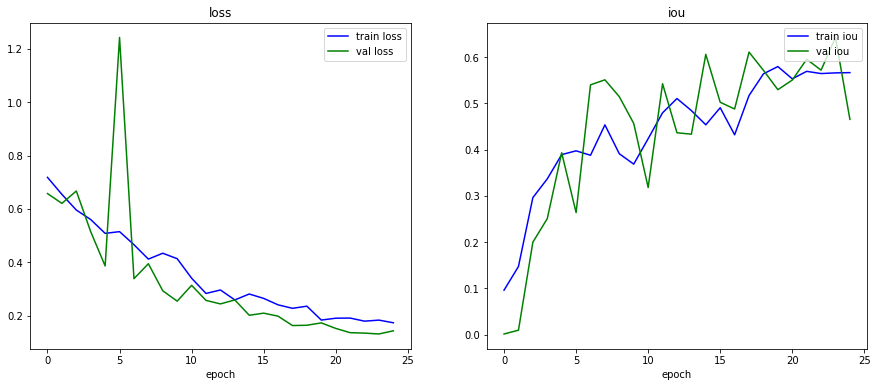

In [ ]:
train_loss_data = [i.detach().cpu().numpy() for i in train_loss_list]
val_loss_data = [i.detach().cpu().numpy() for i in val_loss_list]
# train_iou_data = [i.detach().cpu().numpy() for i in train_iou_list]
# val_iou_data = [i.detach().cpu().numpy() for i in val_iou_list]

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6)) 
plt.subplot(1,2,1)
plt.title('loss')
plt.xlabel('epoch')
plt.plot(train_loss_data, 'b', label='train loss')
plt.plot(val_loss_data, 'g', label='val loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.title('iou')
plt.xlabel('epoch')
plt.plot(train_iou_list, 'b', label='train iou')
plt.plot(val_iou_list, 'g', label='val iou')
plt.legend(loc='upper right')

plt.show()

TEST 실제값, 예측값 시각화

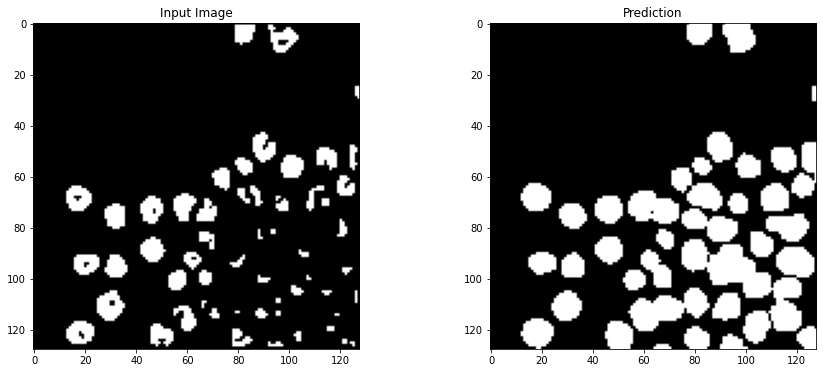

In [ ]:
for img_, mask_ in valid_loader:
    img = img_[1].to(device)
    img.unsqueeze_(0)
    mask_pred = model(img.float())
    mask_pred = mask_pred.cpu()
    mask_pred = (mask_pred > 0.75)
    mask_true = mask_[1]

    img = TF.to_pil_image(mask_pred.float().squeeze(0))
    mask = TF.to_pil_image(mask_true)

    img = np.array(img)
    mask = np.array(mask)

    fig, (axis_1, axis_2) = plt.subplots(1, 2, figsize=(15, 6))
    axis_1.imshow(img.astype(np.uint8), cmap='gray')
    axis_1.set_title('Input Image')
    axis_2.imshow(mask.astype(np.uint8), cmap='gray')
    axis_2.set_title('Prediction')
    plt.show()

    break

- 아무런 Data Augmentation 기법 없이 진행되었을 때는 마지막 epoch에서 Train IoU가 0.57, Validation IoU가 0.47 정도이고 평균은 둘 다 0.44값이 나왔습니다.
- validation 데이터를 이용하여 실제값과 예측값을 시각화 해보았을 때, 잘 예측되어 있지만 자잘자잘한 디테일 부분이나 세포 가운데 구멍은 예측을 못 한 것을 확인할 수 있습니다.

### **2) 논문 Data Augmentation 기법 적용 후 학습**

- 다음은 앞서 얘기한 논문에서의 전처리 방법을 적용하였습니다.
- Overlap-tile과 center_Crop 그리고 Elastic 변환 방법을 적용하였습니다.

custom dataset인 UNETDataset_DAug 정의

In [ ]:
""" augmentation custom dataset """
class UNetDataset_DAug(Dataset):
    def __init__(self, images_np, masks_np):
        self.images_np = images_np
        self.masks_np = masks_np
    
    def transform(self, image_np, mask_np):
        ToPILImage = transforms.ToPILImage()
        image = ToPILImage(image_np)
        mask = ToPILImage(mask_np.astype(np.int32))
        
        image = TF.pad(image, padding = 20, padding_mode = 'reflect')
        mask = TF.pad(mask, padding = 20, padding_mode = 'reflect')
              
        angle = random.uniform(-10, 10)
        width, height = image.size
        max_dx = 0.1 * width
        max_dy = 0.1 * height
        translations = (np.round(random.uniform(-max_dx, max_dx)), np.round(random.uniform(-max_dy, max_dy)))
        scale = random.uniform(0.8, 1.2)
        shear = random.uniform(-0.5, 0.5)
        image = TF.affine(image, angle = angle, translate = translations, scale = scale, shear = shear)
        mask = TF.affine(mask, angle = angle, translate = translations, scale = scale, shear = shear)
        

        image = TF.center_crop(image, (128, 128))
        mask = TF.center_crop(mask, (128, 128))
        
        image = TF.to_tensor(image)
        mask = TF.to_tensor(mask)
        return image, mask

    def __len__(self):
        return len(self.images_np)
    
    def __getitem__(self, idx):
        image_np = self.images_np[idx]
        mask_np = self.masks_np[idx]
        image, mask = self.transform(image_np, mask_np)
        
        return image, mask

tensor로 변환된 데이터를 이용한 DataLoader 생성

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=0)
train_dataset = UNetDataset_DAug(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_dataset = UNetDataset_DAug(x_val, y_val)
valid_loader = DataLoader(valid_dataset, batch_size=8, shuffle=False)

앞서 봤던 U-NET 정의

In [ ]:
model2 = UNet(in_channel=3, out_channel=1).to(device)

parameter 정의

In [ ]:
epochs=25 # 3 -> 25
alpha=5
batch_size = 16 # 각자 메모리 상태에 맞게 변경하셔도 됩니다.
# nn.CrossEntropyLoss() (paper) -> BCELoss()
criterion=nn.BCELoss()
optimizer = optim.Adam(model2.parameters(), lr=1e-3)
train_iou_sum = 0
valid_iou_sum = 0

Training

In [ ]:
train_loss_list = []
val_loss_list = []
train_iou_list = []
val_iou_list = []

for epoch in range(epochs):
    model2.train()
    train_loss = 0
    train_iou = 0

    for image, mask in train_loader:
        image = image.to(device)
        mask = mask.to(device)
        optimizer.zero_grad()
        outputs = model2(image.float())
    
        loss = criterion(outputs.float(), mask.float())
        train_loss += loss

        train_iou += iou_metric(outputs, mask)
        rev_iou = 16 - iou_metric(outputs, mask)
        loss += alpha * rev_iou

        loss.backward()
        optimizer.step()

    model2.eval()
    with torch.no_grad():
        valid_loss = 0
        valid_iou = 0

        for image_val, mask_val in valid_loader:
            image_val = image_val.to(device)
            mask_val = mask_val.to(device)
            output_val = model2(image_val.float())
            valid_loss += criterion(output_val.float(), mask_val.float())
            valid_iou += iou_metric(output_val, mask_val)

    print("Epoch ", epoch + 1, " Training Loss: ", train_loss/len(train_loader), "Validation Loss: ", valid_loss/len(valid_loader))
    print("Training IoU: ", train_iou/len(train_loader), "Validation IoU: ", valid_iou/len(valid_loader))
    train_iou_sum += train_iou/len(train_loader)
    valid_iou_sum += valid_iou/len(valid_loader)

    # visualization
    train_loss_list.append(train_loss/len(train_loader))
    val_loss_list.append(valid_loss/len(valid_loader))
    train_iou_list.append(train_iou/len(train_loader))
    val_iou_list.append(valid_iou/len(valid_loader)
)
    
print("Training Mean IoU: {:.2f}".format(train_iou_sum/epochs), " Validation Mean IoU: {:.2f}".format(valid_iou_sum/epochs))

Epoch  1  Training Loss:  tensor(0.7129, device='cuda:0', grad_fn=<DivBackward0>) Validation Loss:  tensor(0.7329, device='cuda:0')
Training IoU:  0.11800612515920658 Validation IoU:  0.026887695431818247
Epoch  2  Training Loss:  tensor(0.6641, device='cuda:0', grad_fn=<DivBackward0>) Validation Loss:  tensor(0.6378, device='cuda:0')
Training IoU:  0.17276665795076113 Validation IoU:  0.02734322059867489
Epoch  3  Training Loss:  tensor(0.6365, device='cuda:0', grad_fn=<DivBackward0>) Validation Loss:  tensor(0.5255, device='cuda:0')
Training IoU:  0.20468483668382662 Validation IoU:  0.00038001713271975594
Epoch  4  Training Loss:  tensor(0.5855, device='cuda:0', grad_fn=<DivBackward0>) Validation Loss:  tensor(0.5381, device='cuda:0')
Training IoU:  0.2864675361908616 Validation IoU:  0.02566986335792369
Epoch  5  Training Loss:  tensor(0.5605, device='cuda:0', grad_fn=<DivBackward0>) Validation Loss:  tensor(0.4135, device='cuda:0')
Training IoU:  0.3381269043163027 Validation IoU:

Loss, IoU값 시각화

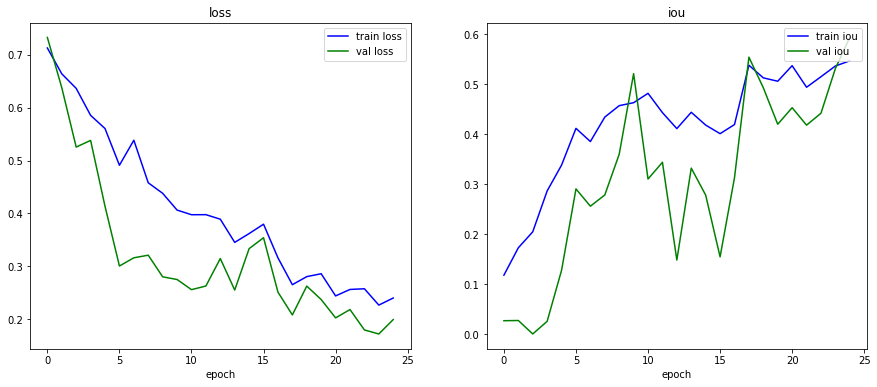

In [ ]:
train_loss_data = [i.detach().cpu().numpy() for i in train_loss_list]
val_loss_data = [i.detach().cpu().numpy() for i in val_loss_list]
# train_iou_data = [i.detach().cpu().numpy() for i in train_iou_list]
# val_iou_data = [i.detach().cpu().numpy() for i in val_iou_list]

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6)) 
plt.subplot(1,2,1)
plt.title('loss')
plt.xlabel('epoch')
plt.plot(train_loss_data, 'b', label='train loss')
plt.plot(val_loss_data, 'g', label='val loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.title('iou')
plt.xlabel('epoch')
plt.plot(train_iou_list, 'b', label='train iou')
plt.plot(val_iou_list, 'g', label='val iou')
plt.legend(loc='upper right')

plt.show()

TEST 실제값, 예측값 시각화

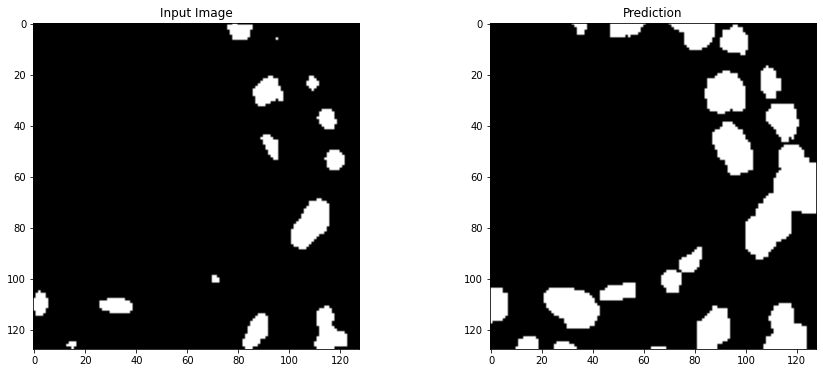

In [ ]:
for img_, mask_ in valid_loader:
    img = img_[1].to(device)
    img.unsqueeze_(0)
    mask_pred = model2(img.float())
    mask_pred = mask_pred.cpu()
    mask_pred = (mask_pred > 0.75)
    mask_true = mask_[1]

    img = TF.to_pil_image(mask_pred.float().squeeze(0))
    mask = TF.to_pil_image(mask_true)

    img = np.array(img)
    mask = np.array(mask)

    fig, (axis_1, axis_2) = plt.subplots(1, 2, figsize=(15, 6))
    axis_1.imshow(img.astype(np.uint8), cmap='gray')
    axis_1.set_title('Input Image')
    axis_2.imshow(mask.astype(np.uint8), cmap='gray')
    axis_2.set_title('Prediction')
    plt.show()

    break

- 논문과 동일한 Data Augmentation 기법을 적용하여 진행되었을 때는 마지막 epoch에서 Train IoU가 0.54, Validation IoU가 0.59 정도이고 평균은 0.42, 0.31값이 나왔습니다. 마지막 epoch에서는 값이 높지만 평균 IoU값이 낮은 이유는 IoU값이 변동성이 심해서 인 듯 합니다.
- 실제값과 예측값을 시각화 해보았을 때, 잘 예측되어 있지만 세포 부분의 끝 부분의 일그러짐은 잘 예측하지 못한 모습이 보입니다.

### 3) OpenCV Data Augmentation 기법 적용 후 학습
- **Gaussian Blur 적용**


OpenCV Data Augmentation을 활용하기 위해 평균 블러링, 미디언 블러링, 모폴로지 변환 등 다양한 기법을 사용하여 실험해 본 결과, 가우시안 블러링을 채택하기로 하였습니다. </br>

평균이 아닌 가우시안 분포를 갖는 커널로 블러링을 하는 것을 **가우시안 블러링**이라고 합니다. 가우시안 커널은 중앙 값이 가장 크고 멀어질수록 그 값이 작아지는 커널을 사용하는 것을 말합니다.</br>

저희 게시글에서도 여러 블러링 기법과 모폴로지 변환에 관해 연재한 적이 있습니다! 자세한 내용은 아래의 링크 참고 바랍니다 :) </br>

**[5편. OpenCV 영상필터](https://dacon.io/codeshare/4898?page=1&dtype=recent)**<br>

custom dataset UNetDataset_Gaussian class 정의

In [ ]:
class UNetDataset_Gaussian(Dataset):
    def __init__(self, images_np, masks_np):
        self.images_np = images_np
        self.masks_np = masks_np
    
    def transform(self, image_np, mask_np):
        ToPILImage = transforms.ToPILImage()
        # image = ToPILImage(image_np)
        mask = ToPILImage(mask_np.astype(np.int32))

        kernel_size=(5,5)
        # image = TF.pad(image, padding = 20, padding_mode = 'reflect')
        # mask = TF.pad(mask, padding = 20, padding_mode = 'reflect')

        # image = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)
        image = cv2.GaussianBlur(image_np, kernel_size,0)
        # mask = cv2.blur(mask_np, kernel_size)
        # mask = mask_np

        image = TF.to_tensor(image)
        mask = TF.to_tensor(mask)

        return image, mask

    def __len__(self):
        return len(self.images_np)
    
    def __getitem__(self, idx):
        image_np = self.images_np[idx]
        mask_np = self.masks_np[idx]
        image, mask = self.transform(image_np, mask_np)
        
        return image, mask

tensor로 변환된 데이터를 이용한 DataLoader 생성

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=0)
train_dataset = UNetDataset_Gaussian(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_dataset = UNetDataset_Gaussian(x_val, y_val)
valid_loader = DataLoader(valid_dataset, batch_size=8, shuffle=False)

앞서 봤던 U-NET 정의

In [ ]:
model3 = UNet(in_channel=3, out_channel=1).to(device)

parameter 정의

In [ ]:
epochs=25 # 3 -> 25
alpha=5
batch_size = 16 # 각자 메모리 상태에 맞게 변경하셔도 됩니다.
# nn.CrossEntropyLoss() (paper) -> BCELoss()
criterion=nn.BCELoss()
optimizer = optim.Adam(model3.parameters(), lr=1e-3)
train_iou_sum = 0
valid_iou_sum = 0

Training

In [ ]:
train_loss_list = []
val_loss_list = []
train_iou_list = []
val_iou_list = []

for epoch in range(epochs):
    model3.train()
    train_loss = 0
    train_iou = 0

    for image, mask in train_loader:
        image = image.to(device)
        mask = mask.to(device)
        optimizer.zero_grad()
        outputs = model3(image.float())
    
        loss = criterion(outputs.float(), mask.float())
        train_loss += loss

        train_iou += iou_metric(outputs, mask)
        rev_iou = 16 - iou_metric(outputs, mask)
        loss += alpha * rev_iou

        loss.backward()
        optimizer.step()

    model3.eval()
    with torch.no_grad():
        valid_loss = 0
        valid_iou = 0

        for image_val, mask_val in valid_loader:
            image_val = image_val.to(device)
            mask_val = mask_val.to(device)
            output_val = model3(image_val.float())
            valid_loss += criterion(output_val.float(), mask_val.float())
            valid_iou += iou_metric(output_val, mask_val)

    print("Epoch ", epoch + 1, " Training Loss: ", train_loss/len(train_loader), "Validation Loss: ", valid_loss/len(valid_loader))
    print("Training IoU: ", train_iou/len(train_loader), "Validation IoU: ", valid_iou/len(valid_loader))
    train_iou_sum += train_iou/len(train_loader)
    valid_iou_sum += valid_iou/len(valid_loader)

    # visualization
    train_loss_list.append(train_loss/len(train_loader))
    val_loss_list.append(valid_loss/len(valid_loader))
    train_iou_list.append(train_iou/len(train_loader))
    val_iou_list.append(valid_iou/len(valid_loader)
)
    
print("Training Mean IoU: {:.2f}".format(train_iou_sum/epochs), " Validation Mean IoU: {:.2f}".format(valid_iou_sum/epochs))

Epoch  1  Training Loss:  tensor(0.7231, device='cuda:0', grad_fn=<DivBackward0>) Validation Loss:  tensor(0.6921, device='cuda:0')
Training IoU:  0.083160484199668 Validation IoU:  0.032038514572644686
Epoch  2  Training Loss:  tensor(0.6669, device='cuda:0', grad_fn=<DivBackward0>) Validation Loss:  tensor(0.6148, device='cuda:0')
Training IoU:  0.16051326286300127 Validation IoU:  0.0018790246233140202
Epoch  3  Training Loss:  tensor(0.6551, device='cuda:0', grad_fn=<DivBackward0>) Validation Loss:  tensor(0.7019, device='cuda:0')
Training IoU:  0.2001782955458619 Validation IoU:  0.046863182441928955
Epoch  4  Training Loss:  tensor(0.6264, device='cuda:0', grad_fn=<DivBackward0>) Validation Loss:  tensor(0.5401, device='cuda:0')
Training IoU:  0.24697049137624635 Validation IoU:  0.0018818826582034588
Epoch  5  Training Loss:  tensor(0.6113, device='cuda:0', grad_fn=<DivBackward0>) Validation Loss:  tensor(0.5746, device='cuda:0')
Training IoU:  0.25730800702472983 Validation IoU

Loss, IoU값 시각화

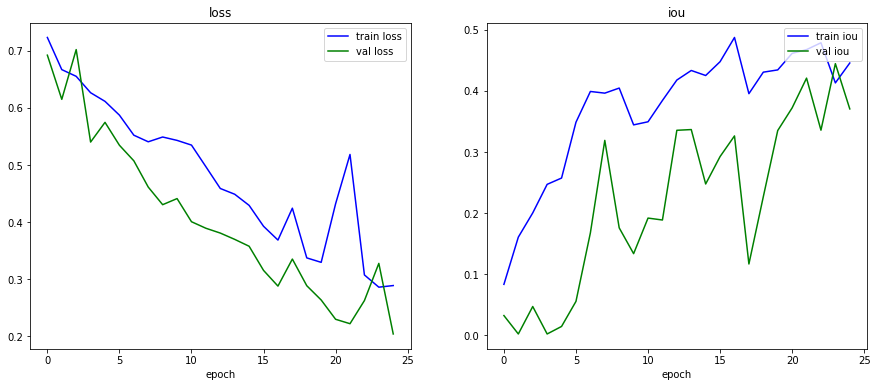

In [ ]:
train_loss_data = [i.detach().cpu().numpy() for i in train_loss_list]
val_loss_data = [i.detach().cpu().numpy() for i in val_loss_list]
# train_iou_data = [i.detach().cpu().numpy() for i in train_iou_list]
# val_iou_data = [i.detach().cpu().numpy() for i in val_iou_list]

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6)) 
plt.subplot(1,2,1)
plt.title('loss')
plt.xlabel('epoch')
plt.plot(train_loss_data, 'b', label='train loss')
plt.plot(val_loss_data, 'g', label='val loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.title('iou')
plt.xlabel('epoch')
plt.plot(train_iou_list, 'b', label='train iou')
plt.plot(val_iou_list, 'g', label='val iou')
plt.legend(loc='upper right')

plt.show()

TEST 실제값, 예측값 시각화

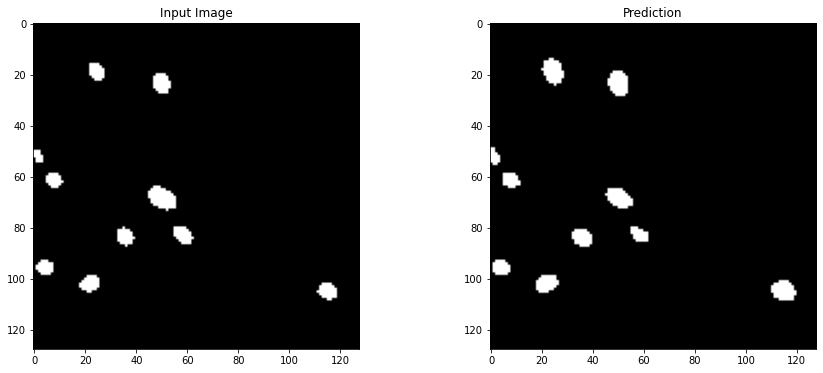

In [ ]:
for img_, mask_ in valid_loader:
    img = img_[1].to(device)
    img.unsqueeze_(0)
    mask_pred = model3(img.float())
    mask_pred = mask_pred.cpu()
    mask_pred = (mask_pred > 0.75)
    mask_true = mask_[1]

    img = TF.to_pil_image(mask_pred.float().squeeze(0))
    mask = TF.to_pil_image(mask_true)

    img = np.array(img)
    mask = np.array(mask)

    fig, (axis_1, axis_2) = plt.subplots(1, 2, figsize=(15, 6))
    axis_1.imshow(img.astype(np.uint8), cmap='gray')
    axis_1.set_title('Input Image')
    axis_2.imshow(mask.astype(np.uint8), cmap='gray')
    axis_2.set_title('Prediction')
    plt.show()

    break

- OpenCV Data Augmentation 기법을 적용하여 진행되었을 때는 마지막 epoch에서 Train IoU가 0.45, Validation IoU가 0.37 정도이고 평균은 0.37, 0.22값이 나왔습니다.
- 앞서 한 결과중에 가장 예측을 못한 것으로 보입니다.
- 시각화 결과 중간 덩어리는 잘 잡아냈는데 가 부분이 전혀 다른 것을 살펴볼 수 있습니다.

### 4) 결론
|Augmentation 방법|train iou|validation iou|
|------|---|---|
|x|0.57|0.47|
|논문 기법|0.54|**0.59**|
|OpenCV 기법|0.45|0.37|

- IoU값을 비교해서 표로 만들어본 결과입니다.
- DataAugmentation을 적용한 방법이 U-Net 모형에 대하여 가장 좋은 전처리 방법입니다. 사실 논문 저자도 수많은 전처리 방법을 이용하여 논문을 냈기 때문에 당연한 결과입니다. 
- 새로운 전처리 기법을 적용해보기 위해 OpenCV 전처리 기법을 사용하였습니다.하지만 사용 결과 IoU값이 **현저히 떨어지는 것**을 확인할 수 있었습니다. 이는 **Gaussian Blur**를 통해 기존 이미지에서 Noise가 많이 없어졌고, 이를 학습하여 **좀 더 어렵게 학습 시켜** IoU값이 낮게 나온 것 같습니다. 
- 데이터에 맞는 전처리 기법을 이용하면 조금 더 잘 나올 수도 있겠다는 생각이 들었지만, 배운 OpenCV를 한 번 적용 했다는 의의를 가졌습니다!

### [마무리]
- U-Net에 대하여 공부하고 전처리 기법들을 적용시켜보았습니다.
- 다음은 똑같은 방법을 ResU-Net에 적용해보겠습니다. U-Net보다 성능이 좋기 때문에 좋은 시각화가 나오지 않을까 기대됩니다.

# 감사합니다 :)